In [2]:
#GROUP MEMBERS: BENJAMIN SHIRLEY, EVAN DARTT, SETH HARVEY
#UFC FIGHTER PARSER. CONTAINS NAME, NICKNAME, HEIGHT, WEIGHT, REACH, STANCE, AND RECORD
#Module 2 Assignment 2

from urllib.request import Request, urlopen


letterList = ["a","b","c","d","e", "f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

##download  http://www.ufcstats.com/statistics/fighters?char=a&page=all
for posn in range(0, 26):
    print("Saving Webpage for last names starting with: " + letterList[posn])
    if letterList[posn] == "z":
        url = ('http://www.ufcstats.com/statistics/fighters?char=' + letterList[posn])
        req = Request(url, headers={'User-Agent': ''})
        html = urlopen(req).read()
    else:
        url = ('http://www.ufcstats.com/statistics/fighters?char=' + letterList[posn] + '&page=all')
        req = Request(url, headers={'User-Agent': ''})
        html = urlopen(req).read()


##save file to disk                                                                                                                                                           
    f = open('ufcStats' + letterList[posn] + '.html','w')
    f.write(html.decode('utf-8'))
    f.close()

Saving Webpage for last names starting with: a
Saving Webpage for last names starting with: b
Saving Webpage for last names starting with: c
Saving Webpage for last names starting with: d
Saving Webpage for last names starting with: e
Saving Webpage for last names starting with: f
Saving Webpage for last names starting with: g
Saving Webpage for last names starting with: h
Saving Webpage for last names starting with: i
Saving Webpage for last names starting with: j
Saving Webpage for last names starting with: k
Saving Webpage for last names starting with: l
Saving Webpage for last names starting with: m
Saving Webpage for last names starting with: n
Saving Webpage for last names starting with: o
Saving Webpage for last names starting with: p
Saving Webpage for last names starting with: q
Saving Webpage for last names starting with: r
Saving Webpage for last names starting with: s
Saving Webpage for last names starting with: t
Saving Webpage for last names starting with: u
Saving Webpag

In [50]:
from bs4 import BeautifulSoup
fightsByClass = []
strawweight = 0
flyweight = 0
bantamweight = 0
featherweight = 0
lightweight = 0
welterweight = 0
middleweight = 0
lightheavyweight = 0
heavyweight = 0
reachDiffList = []
totalFightList = []
recordList = []
weightList = []
weightListTwo = []
heightList = []
letterList = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
for posn in range(0, 26):


    filein = 'ufcStats' + str(letterList[posn]) + '.html'
    soup = BeautifulSoup(open(filein), 'lxml')
    body = soup.find('body')

    entries = body.find_all('tr')
    for entry in entries:
        

        columns = entry.find_all('td', attrs={'class' : 'b-statistics__table-col'})
        
        if len (columns)>8 :

            #get first name
            fname = columns[0].get_text()

            #get last name
            lname = columns[1].get_text()

            #get nickname
            if "--" in columns[2].get_text():
                nickname = "None"
            else:
                nickname = "'" + columns[2].get_text() + "'"
            
            #get height
            height = columns[3].get_text()
            height = height.replace(" ", "")
            height = height.replace("\n", "")
            height = height.replace("'", "")
            height = height[:-1]
            
            #get weight
            weight = columns[4].get_text()
            weight = weight.replace(" ", "")
            weight = weight.replace("\n", "")
            weight = weight.replace("'", "")
            weight = weight.replace("lbs", "")
            weight = weight[:-1]
            
            if height == "-":
                height = "Unknown"
            
            elif weight == "-":
                weight = "Unknown"
            
            elif height == "Unknown" or weight == "Unknown":
                hi = "hi"
                
                
            else:
                height = ((int(height[0:1]) * 12) + int(height[1:]))
                heightList.append(height)
                weightList.append(weight)
                
            for i in range(0, len(weightList)):
                weightList[i] = int(weightList[i])
                
            
                

            #get reach
            if "--" in columns[5].get_text():
                reach = "Unknown"
                
            else: reach = columns[5].get_text()

            #get stance

            stance = columns[6].get_text()

            #get record
            wins = columns[7].get_text()
            losses = columns[8].get_text()
            draws = columns[9].get_text()
            
            wins = wins.replace(" ", "")
            wins = wins.replace("\n", "")
            losses = losses.replace(" ", "")
            losses = losses.replace("\n", "")
            draws = draws.replace(" ", "")
            draws = draws.replace("\n", "")
            
            totalFights = (wins + losses + draws)
            
            if int(wins) == 0:
                winRate = 0

            else:
            
                totalFights = (int(wins) + int(losses))
            
                winRate = (int(wins)/totalFights)
                      
            
            reach = reach.replace(" ", "")
            reach = reach.replace("\n", "")
            
            if reach == "Unknown":
                reach = "Unknown"
               
            else:
                reach = reach[0:2]
                
            
            reachDiff = ""
            if reach == "Unknown" or height == "Unknown":
                reachDiff = "Unknown"
            
            else: reachDiff = (int(reach) - height)
            
            smallList = [winRate, reachDiff]
            
            
            if "Unknown" in smallList:
                reachDiff = 3
            
            else:
                reachDiffList.append(reachDiff)
                recordList.append(winRate)
                
            if weight == "-" or weight == "Unknown":
                weight = "Unknown"
               
            
            else:
                print(totalFights, weight)
                totalFightList.append(int(totalFights))
                weightListTwo.append(int(weight))
            
            
            if weight == "Unknown":
                hi =  "hi"
                
            elif int(weight) == 115:
                strawweight += 1
            
            elif int(weight) == 125:
                flyweight +=1
            
            elif int(weight) == 135:
                bantamweight +=1
            
            elif int(weight) == 145:
                featherweight +=1
            
            elif int(weight) == 155: 
                lightweight += 1
            
            elif int(weight) == 170:
                welterweight +=1
                
            elif int(weight) == 185:
                middleweight +=1
                
            elif int(weight) == 205:
                lightheavyweight += 1
            
            elif int(weight) > 205:
                heavyweight +=1
                
            else:
                hi = "hi"
fightsByClass.append(strawweight)
fightsByClass.append(flyweight)      
fightsByClass.append(bantamweight)
fightsByClass.append(featherweight)
fightsByClass.append(lightweight)
fightsByClass.append(welterweight)
fightsByClass.append(middleweight)
fightsByClass.append(lightheavyweight)
fightsByClass.append(heavyweight)



8 155
10 155
24 265
25 235
22 145
8 170
12 185
8 185
19 205
38 180
9 225
8 265
8 185
19 185
27 225
30 155
7 125
5 170
38 185
28 115
20 145
18 155
26 135
24 185
20 170
8 170
16 205
12 245
6 205
030 135
21 135
4 225
12 135
20 264
010 188
9 115
030 185
45 135
29 185
4 145
8 250
17 135
8 170
34 135
12 125
16 145
50 155
21 205
10 155
21 185
19 170
11 145
15 145
5 199
11 250
18 170
18 205
32 205
17 145
17 185
19 170
18 170
12 155
25 135
9 115
9 125
20 170
12 135
5 170
5 185
7 235
35 155
7 125
18 155
43 170
15 170
18 170
46 205
10 154
15 170
10 115
2 185
33 315
20 170
10 185
19 145
2 190
16 185
17 205
22 230
010 240
010 160
19 205
17 155
15 145
15 200
27 115
26 170
18 200
26 185
10 205
7 205
051 205
14 205
16 115
26 205
15 125
4 205
19 251
13 170
35 154
21 255
13 170
30 145
8 170
28 135
33 170
10 125
20 145
22 145
5 155
47 240
22 145
19 205
10 205
33 155
6 170
12 185
2 190
4 125
11 155
18 185
11 125
13 247
18 185
21 170
9 256
11 185
17 145
34 135
18 230
15 170
17 155
11 155
31 155
3 185
13 17

In [44]:
def average_value (x):
    av = 0.0
    num = 0.0
    for i in range(0, len(x)):
        av += float(x[i])
        num += 1.0
    if num > 0.0:
        return av/num
    return None


def std_deviation (x):
    av_x = average_value (x)
    if av_x != None:
        std = 0.0
        num = 0.0
        for i in range(0, len(x)):
            std += (float(x[i]) - av_x)*(float(x[i]) - av_x)
            num += 1.0
        return np.sqrt(std/num)
    return None


def second_moment (x):
    av = 0.0
    num = 0.0
    for i in range(0, len(x)):
        av += float(x[i])*float(x[i])
        num += 1.0
    if num > 0.0:
        return av/num
    return None


def linear_regression (x, y):
    
    if (len(x) != len(y)):
        return None
    
    a_x =  average_value (x)
    a_y =  average_value (y)
    s_x =  std_deviation (x)
    s_y =  std_deviation (y)
    m_x =  second_moment (x)
    m_y =  second_moment (y)
    
    
    p = []
    for i in range(0, len(x)):
        p.append(float(x[i])*float(y[i]))
    a_p = average_value (p)
    
    ##linear correlation coefficient
    r = (a_p - a_x*a_y) / np.sqrt ( (m_x-a_x*a_x) * (m_y-a_y*a_y) )
    
    
    ##best fit
    beta = r * s_y / s_x
    alpha = a_y - beta * a_x
    
    
    return alpha, beta, r

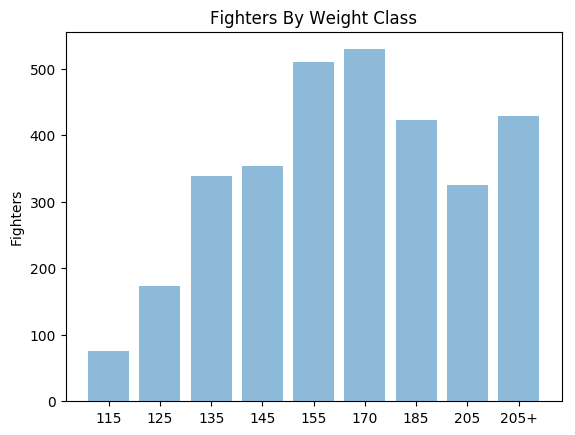

In [54]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('115', '125', '135', '145', '155', '170', '185', '205', '205+')
y_pos = np.arange(len(objects))


plt.bar(y_pos, fightsByClass, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Fighters')
plt.title('Fighters By Weight Class')

plt.show()

In [56]:
# https://pythonspot.com/matplotlib-bar-chart/

# This graph shows the total amount of fighters in each weight class.

# This is interesting because it resembles a bell curve and shows the average
#weight of fighters. The right side of the graph is slightly higher due to 
#the final weight class being 205+


# We thought to include this as it would be a good warm up to our next graph
#is the amount of fights a fighter has based on their weight class.

alpha :  172.58004055408432
beta :  0.06560813311715938
correlation coefficient :  0.01967032300780978


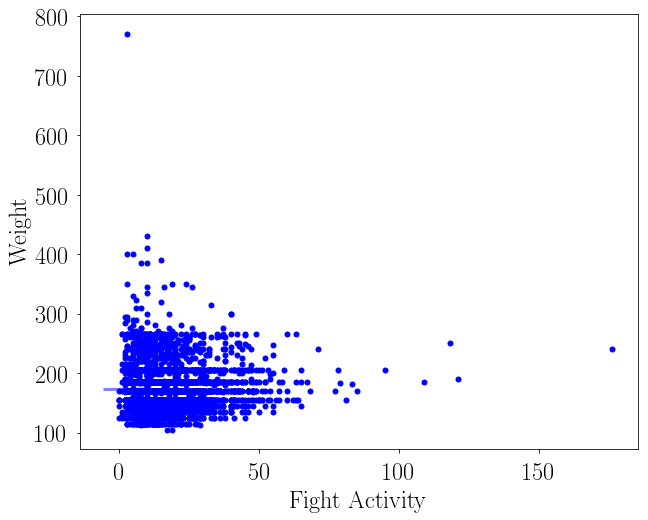

In [57]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(totalFightList, weightListTwo)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)

plt.figure(figsize=(10,8))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



plt.plot(totalFightList,weightListTwo, marker='o', color ='blue', markersize=5, linewidth=0)
best_fit_x = np.arange(-5,10)
best_fit_y = intercept + slope * best_fit_x
plt.plot(best_fit_x, best_fit_y, color ='blue', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)



plt.ylabel('Weight')
plt.xlabel('Fight Activity')

plt.show()


In [ ]:
# In this chart, we wanted to show how active fighters are compared to their
#weight. We thought this may be interesting to view since a fighter that weighs
#more takes more of a toll on their body with physical activity and is more
#susceptible to injury.

# The graph showed this as you can see that lower weighted fighters on average 
#fight significantly more than heavier fighters. No fighters over 300 pounds
#fought more than 45 times.